# Performing a basic analysis using Diwata-2 data

#### Description
This notebook demonstrates different analysis that can be performed in the Open Data Cube using the Diwata-2 SMI dataset.

#### Background
Diwata-2 has been able to capture 84% (as of October 30, 2021) of the land cover of the Philippines. Using these images and the previous guides, we can perform an analysis to understand some phenomena on Eath's surface. We can begin with some question.

The examples here are simple and without much context. The following are example questions.
1. Which part of a given area have healthy vegetation? How is the health of vegetation changing over time?
2. What is the extent of ash fall after the 2020 Taal volcano explosion?

## Example 1. NDVI

### Choose a study area
It is important to load as much data as needed only to load data faster and avoid the notebook from crashing due to deficient memory. One way is to limit the study area by setting a coordinate pair and adding a buffer. You can use [Google Maps](https://www.google.com/maps) to know a coordinate pair of a location. Another way is knowing the bouding box of the study area. You can use the [bboxfinder](http://bboxfinder.com/) tool to do this.

In [1]:
lat = (15.9613, 18.7867)
lon = (119.6246, 121.0693)

### Display study area

In [2]:
from ph_odc_tools import display_map

display_map(x=lon, y=lat)

Map(center=[17.374, 120.34694999999999], controls=(AttributionControl(options=['position', 'prefix'], position…

### Loading data

In [3]:
import datacube

dc = datacube.Datacube(app="my_analysis")
ds = dc.load(product="diwata2_smi_l1c",
             x=lon,
             y =lat,
             time=("2019-01-01", "2019-12-31"),
             output_crs='EPSG:32651',
             resolution=(-122, 122)
            )

ds

<xarray.Dataset>
Dimensions:      (time: 7, y: 2583, x: 1295)
Coordinates:
  * time         (time) datetime64[ns] 2019-04-02T05:15:31 ... 2019-12-16T05:...
  * y            (y) float64 2.081e+06 2.081e+06 ... 1.766e+06 1.766e+06
  * x            (x) float64 1.387e+05 1.388e+05 ... 2.964e+05 2.965e+05
    spatial_ref  int32 32651
Data variables:
    band1        (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    band2        (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    band3        (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    band4        (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    band5        (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    band6        (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    band7        (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    band8        (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    band9        (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    crs:           EPSG:32651
    grid_mapping:  spatial_ref

In [4]:
ds1 = ds.where(ds > 0)

### Plotting the RGB

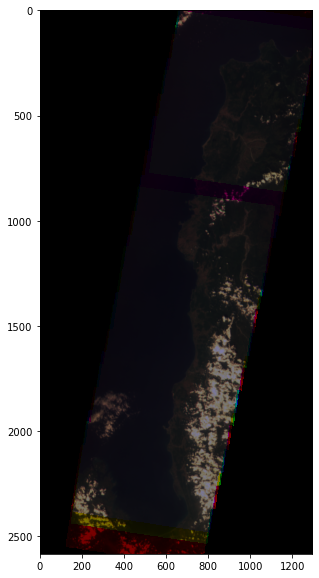

In [5]:
import numpy as np
import matplotlib.pyplot as plt

rgb = np.dstack((ds1.band4.isel(time=3).values,
                 ds1.band2.isel(time=3).values,
                 ds1.band1.isel(time=3).values))

plt.figure(figsize = (20,10))
plt.imshow(rgb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


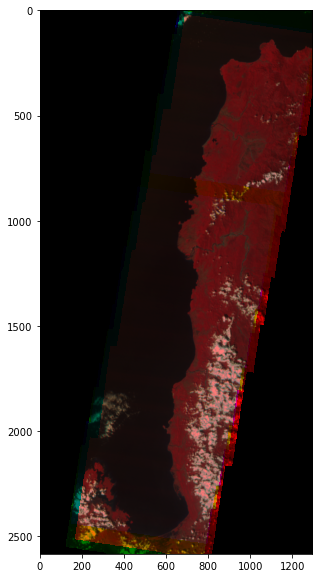

In [6]:
false_composite = np.dstack((ds1.band8.isel(time=3).values,
                 ds1.band4.isel(time=3).values,
                 ds1.band2.isel(time=3).values))

plt.figure(figsize = (20,10))
plt.imshow(false_composite)

### Perform analysis

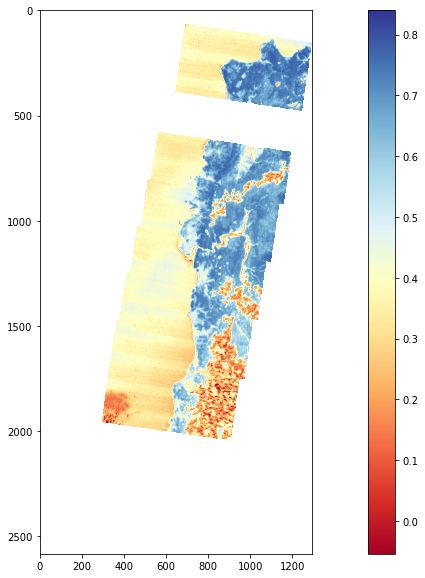

In [7]:
ndvi = (ds1.band6 - ds1.band3) / (ds1.band6 + ds1.band3)
plt.figure(figsize = (20,10))
plt.imshow(ndvi.isel(time=3).values, cmap="RdYlBu")
plt.clim(-0.054,0.84)
plt.colorbar()
plt.show()